In [1]:
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import colorConverter as cc
import csv
import numpy as np
pylab.rcParams['figure.figsize'] = (13, 8)

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

exp_path = '/Users/xnimir/Desktop/'
d_params = pd.read_excel(exp_path + 'Cs EA (1).xlsx'
                   ,sheet_name = 'Counter Feb 11_new') # need to fill in the excel sheet

df_curr = pd.DataFrame(d_params,columns = ['Ion current1 (pA)'])
df_curr = df_curr.to_numpy()
i_s = df_curr.flatten() # number of cycles for each data set
i_s = np.array(i_s)
df_rpow = pd.DataFrame(d_params,columns = ['Laser power red (mW)'])
df_rpow = df_rpow.to_numpy()
p_r = df_rpow.flatten() # number of cycles for each data set
p_r = np.array(p_r)
df_gpow = pd.DataFrame(d_params,columns = ['Laser power green (mW)'])
df_gpow = df_gpow.to_numpy()
p_g = df_gpow.flatten() # number of cycles for each data set
p_g = np.array(p_g)
df_avg = pd.DataFrame(d_params,columns = ['AverageSignal'])
df_avg = df_avg.to_numpy()
avgs = df_avg.flatten() # number of cycles for each data set
avgs_n = np.array(avgs)/(i_s*p_r*p_g)

df_wl = pd.DataFrame(d_params,columns = [' WL red (nm)'])
df_wl = df_wl.to_numpy()
wls = df_wl.flatten() # number of cycles for each data set
wls = np.array(wls)

h=6.62607015e-34
hc = 1239.84193 #eV/nm
j_eV = 6.2415093e18
c =299792458
ens = hc/wls
omegas = 2*np.pi*(c/wls)
cross_section = avgs_n*omegas

x1 = ens[:14]
y1 = cross_section[:14]
print (wls[:14],ens[:14])

[643.9857 643.8843 643.7845 643.8348 643.855  643.8648 643.8638 643.8615
 643.86   643.8563 643.7553 643.7063 643.6562 643.8058] [1.92526314 1.92556633 1.92586484 1.92571438 1.92565396 1.92562465
 1.92562764 1.92563452 1.92563901 1.92565007 1.92595219 1.9260988
 1.92624872 1.92580112]


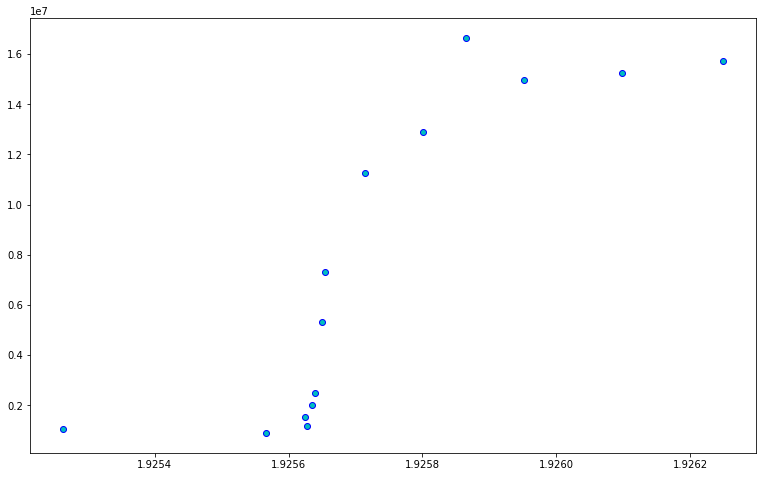

In [3]:
fig = plt.figure()
l = plt.plot(x1, y1, 'bo')
plt.setp(l, markersize=6)
plt.setp(l, markerfacecolor='c')
plt.show()

In [6]:
from scipy.optimize import curve_fit

def Wigner(x,a,b,ea):
    return a + b*np.sqrt(x-ea+np.abs(x-ea))

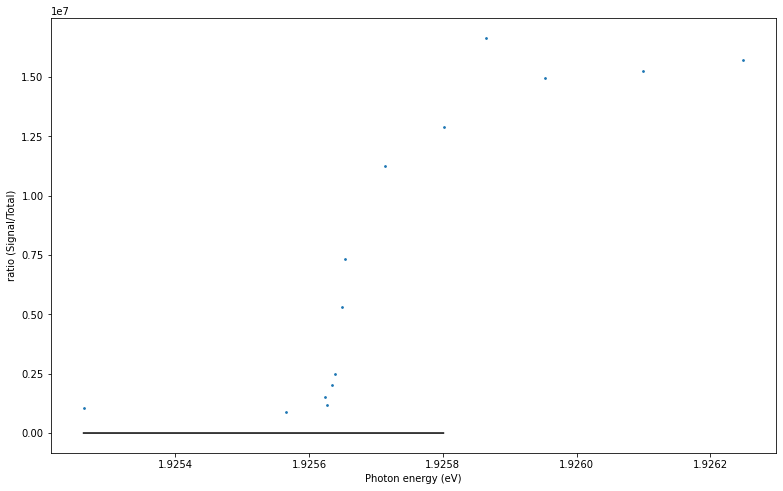

black Wigner fitted curve:  [  1.    200.      1.916] with error:  [4.05620880e+09 1.39385382e+10 1.47737507e+06]


In [7]:
a=0.35
b=35
ea=1.926
setColor1='black'
setColor2=[1,0,0]
xarray=np.arange(x1[0],x1[len(x1)-1],0.0000001)
bound_par = ([0,0,ea-0.01],[1,200,ea+0.01])
pl0, covl0 = curve_fit(Wigner, x1, y1,[a,b,ea],bounds=bound_par)
#pl2, covl2 = curve_fit(Wigner, x1, y1,[a,b,ea],bounds=bound_par)
#plt.errorbar(x1, y1, yerr=erry, fmt='.k',color='blue', capthick=0.5,capsize=5,elinewidth=0.5)
plt.plot(xarray,Wigner(xarray, *pl0),label='fit',color=setColor1)
plt.scatter(x1,y1,s=3)
#plt.plot(xarray,Wigner(xarray, *pl2),label='fit',color=setColor2)
plt.xlabel("Photon energy (eV)")
plt.ylabel("ratio (Signal/Total)")
show()
print(setColor1,'Wigner fitted curve: ' ,pl0, "with error: ",np.sqrt(np.diag(covl0)))

(27, 27, 27)


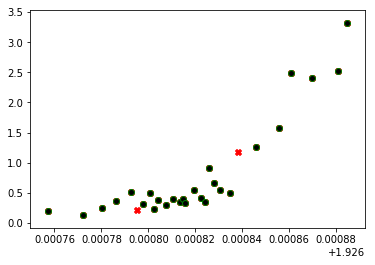

In [23]:
#taking away outliers
x2=numpy.delete(x1,[5,22])
y2=numpy.delete(y1,[5,22])
erry2=numpy.delete(erry,[5,22])

print (len(x2),len(y2),len(erry2))

l1=plt.plot(x2,y2,'go')
l2=plt.scatter(x1,y1,color='red',marker='X')
plt.setp(l1, markersize=6)
plt.setp(l1, markerfacecolor='black')
plt.show()

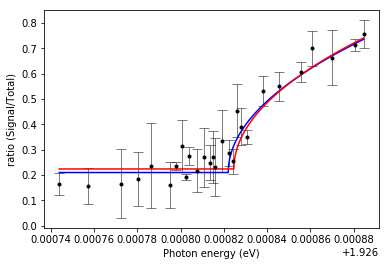

('blue', 'with error: ', array([ 0.21005437, 46.91419072,  1.92682204]))
[8.37765001e-03 1.92449675e+00 8.10037700e-07]


In [14]:
a=0.15
b=35
ea=1.92683
setColor1='blue'
setColor2='red'
bound_par = ([a-0.1,b-20,ea-0.00010],[a+0.1,b+20,ea+0.00010])
pl, covl = curve_fit(Wigner, x2, y2,[a,b,ea],bounds=bound_par, sigma=erry2, absolute_sigma=True)
#pl2, covl2 = curve_fit(Wigner, x2, y2,[a,b,ea],bounds=bound_par)
plt.errorbar(x2, y2, yerr=erry2, fmt='.k',color='blue', capthick=0.5,capsize=5,elinewidth=0.5)
plt.plot(xarray,Wigner(xarray, *pl),label='fit',color=setColor1)
plt.plot(xarray,Wigner(xarray, *pl0),label='fit',color=setColor2)
#plt.plot(xarray,Wigner(xarray, *pl2),label='fit',color=setColor2)
plt.xlabel("Photon energy (eV)")
plt.ylabel("ratio (Signal/Total)")
show()
print(setColor1, "with error: ",pl)
print(np.sqrt(np.diag(covl)))

In [20]:
s0[2]

1.816038826001447e-06